In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

In [2]:
# testing code source
import sys
sys.path.append("..")

In [3]:
import atlas_rbm.atlas as atlas
import atlas_rbm.export as export
import atlas_rbm.simulation as simulation

In [4]:
model1 = atlas.construct_model_from_metabolic_network('../docs/networks/metabolic_network3.tsv', verbose = False)
model2 = atlas.construct_model_from_interaction_network('../docs/networks/ppi_network3.tsv', verbose = False)
atlas.combine_models(model1, model2, verbose = False)

<Model 'atlas_rbm.construct_model_from_interaction_network' (monomers: 2, rules: 22, parameters: 113, expressions: 0, compartments: 0) at 0x7f6290c44e80>

In [5]:
network = '../docs/networks/genomegraphs_network1_lactose.txt'
model3 = atlas.construct_model_from_genome_graph(network, verbose = False)
atlas.combine_models(model2, model3, verbose = False)

<Model 'atlas_rbm.construct_model_from_genome_graph' (monomers: 5, rules: 54, parameters: 153, expressions: 0, compartments: 0) at 0x7f6290bd27f0>

In [12]:
from pysb import *
from pysb.util import *
alias_model_components()

Initial(dna(name = 'lacZ', type = 'pro4', prot = None), Parameter('t0_dna_lacz_pro4', 1))
Initial(dna(name = 'lacZ', type = 'pro3', prot = None), Parameter('t0_dna_lacz_pro3', 1))
Initial(dna(name = 'lacZ', type = 'pro2', prot = None), Parameter('t0_dna_lacz_pro2', 1))
Initial(dna(name = 'lacZ', type = 'pro1', prot = None), Parameter('t0_dna_lacz_pro1', 1))
Initial(dna(name = 'lacZ', type = 'rbs', prot = None), Parameter('t0_dna_lacz_rbs', 1))
Initial(dna(name = 'lacZ', type = 'cds', prot = None), Parameter('t0_dna_lacz_cds', 1))

Initial(dna(name = 'lacY', type = 'pro1', prot = None), Parameter('t0_dna_lacy_pro1', 1))
Initial(dna(name = 'lacY', type = 'rbs', prot = None), Parameter('t0_dna_lacy_rbs', 1))
Initial(dna(name = 'lacY', type = 'cds', prot = None), Parameter('t0_dna_lacy_cds', 1))

Initial(dna(name = 'lacA', type = 'rbs', prot = None), Parameter('t0_dna_laca_rbs', 1))
Initial(dna(name = 'lacA', type = 'cds', prot = None), Parameter('t0_dna_laca_cds', 1))
Initial(dna(name = 'lacA', type = 'ter1', prot = None), Parameter('t0_dna_laca_ter1', 1))
Initial(dna(name = 'lacA', type = 'ter2', prot = None), Parameter('t0_dna_laca_ter2', 1))

Initial(cplx(name = 'RNAP', dna = None, prot = None, rna = None), Parameter('t0_RNAP', 1))
Initial(cplx(name = 'Ribosome', dna = None, prot = None, rna = None), Parameter('t0_ribosome', 1))

Observable('obs_ribosome', cplx(name='Ribosome', dna=None, rna=None))

In [14]:
# model initial condition
simulation.set_initial.met(model3, 'beta_lactose', 'per', 100)
simulation.set_initial.met(model3, 'PROTON', 'per', 100)
simulation.set_initial.met(model3, 'WATER', 'cyt', 100)

simulation.set_initial.prot(model3, 'lacZ', 'cyt', 4)
simulation.set_initial.prot(model3, 'lacA', 'cyt', 3)
simulation.set_initial.prot(model3, 'lacY', 'mem', 1)

<Model 'atlas_rbm.construct_model_from_genome_graph' (monomers: 5, rules: 54, parameters: 168, expressions: 0, compartments: 0) at 0x7f6290bd27f0>

In [15]:
bng = '/opt/git-repositories/bionetgen.RuleWorld/bng2/'
kasim = '/opt/git-repositories/KaSim4.Kappa-Dev/'
export.to_bngl(model2, 'test.bngl', bng)
export.to_kappa(model2, 'test.kappa')

In [16]:
data1 = simulation.ode(model2, start = 0, finish = 10, points = 200, path = bng)
data2 = simulation.ssa(model2, start = 0, finish = 10, points = 200, n_runs = 20, path = bng)
data3 = simulation.kasim(model2, start = 0, finish = 10, points = 200, n_runs = 20, path = kasim)

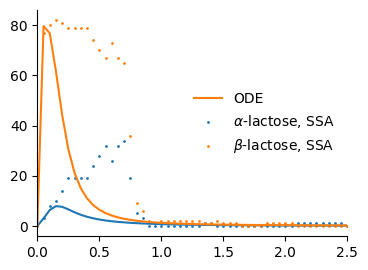

In [17]:
import seaborn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
simulation.plot.metabolite(data2['sims'][1], 'alpha_lactose', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 1, 'label' : r'$\alpha$-lactose, SSA'})
simulation.plot.metabolite(data2['sims'][1], 'beta_lactose', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 1, 'label' : r'$\beta$-lactose, SSA'})
simulation.plot.metabolite(data1, 'alpha_lactose', 'cyt', plt_kws = {'label' : None})
simulation.plot.metabolite(data1, 'beta_lactose', 'cyt', plt_kws = {'label' : 'ODE'})

plt.xlim(0, 2.5)
seaborn.despine()